# Homework 02: Data Visualization and Data Wrangling 
***

**Name**: Julia Troni

***

This assignment is due on Canvas by **6:00PM on Friday September 9**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

As always, you should import Pandas and NumPy when you start working with data.

In [1]:
# Per the standard import pandas as 'pd' and numpy as 'np'
import pandas as pd
import numpy as np


In this homework you will also be creating some graphs. Therefore, lets also load Matplotlib's Pylab library to set up Jupyter so that it will plot directly in the notebook.

Pylab is a convenience module that bulk imports matplotlib.pyplot (for plotting) and NumPy (for working with arrays) in a single name space.

In [2]:
import matplotlib.pylab as plt
%matplotlib inline 
    # 'inline' puts your graph in the cell versus a new popup window

# Problem 1
***
We are tasked with a consulting job for a Hotel/Vacation booking startup called $\color{red}{\text{Hotels Everyone Loves Leasing}}$, or HELL.com (an unfortunate marketing snaffu).

In order to advise HELL.com we will need to wrangle some data and see what story it has to tell before we advise the creators of this new booking website.

# Part A
***1] (1 point) Read in the csv file, "hotel_bookings.csv"***

For simplicity sake, put the data file in the same folder as the Jupyter notebook file.



In [3]:
# Call your dataframe "Hotel" and be sure to preface it with a "df".
# Per the standard naming procedure a prefix of "df" indicates a dataframe.
# Therefore, to be specific, call your dataframe "dfHotel"

# Read in the file here for #1
dfHotel = pd.read_csv("hotel_bookings.csv")

***2] (1 point) Take a look at your data.***

See the description of the data below to determine what each column represents.

Always look at the data to determine if it needs cleaning; in reality data will nearly always need cleaned.

In [4]:
# code here for part A, #2 to see all/partial dataframe
dfHotel.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,distribution_channel,is_repeated_guest,agent,adr,total_of_special_requests
0,Resort Hotel,0,342,27,1,0,0,2,0.0,Direct,0,NaN,0.0,0
1,Resort Hotel,0,737,27,1,0,0,2,0.0,Direct,0,NaN,0.0,0
2,Resort Hotel,0,7,27,1,0,1,1,0.0,Direct,0,NaN,75.0,0
3,Resort Hotel,0,13,27,1,0,1,1,0.0,Corporate,0,304.0,75.0,0
4,Resort Hotel,0,14,27,1,0,2,2,0.0,TA/TO,0,240.0,98.0,1


In [5]:
dfHotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      119390 non-null  object 
 1   is_canceled                119390 non-null  int64  
 2   lead_time                  119390 non-null  int64  
 3   arrival_date_week_number   119390 non-null  int64  
 4   arrival_date_day_of_month  119390 non-null  int64  
 5   stays_in_weekend_nights    119390 non-null  int64  
 6   stays_in_week_nights       119390 non-null  int64  
 7   adults                     119390 non-null  int64  
 8   children                   119386 non-null  float64
 9   distribution_channel       119390 non-null  object 
 10  is_repeated_guest          119390 non-null  int64  
 11  agent                      103050 non-null  float64
 12  adr                        119390 non-null  float64
 13  total_of_special_requests  11

# Description of this data set
The data set looks as if it has alreaded been 'cleaned'.

**hotel**: This column lists the types of hotels that were booked.

**is_cancelled**: This column indicates whether or not the booking was cancelled (1) or not (0).

**lead_time**: This column is the number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

**arrival_date_week_number**: Week number of the year for arrival

**arrival_date_day_of_month**: Day of arrival date.

**stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**adults**: number of adults

**children**: number of children

**distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**is_repeated guest**: Value indicating if the booking name was from a repeated guest (1) or not (0)

**agent**: ID of the travel agency that made the booking

**adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)

# Part B
***

***1] (1 points) Which week-number of the year is the most common arrival week?***

You can use `dfHotel.mode()` to find the mode for $\color{red}{\text{all columns}}$, and you can also use `dfHotel["arrival_date_week_number"].mode()` to find the mode of $\color{red}{\text{just one column}}$, i.e. 'arrival_date_week_number'.

However, when you use the latter, the return will be an index of 0 and then the mode you seek. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html


In [6]:
dfHotel["arrival_date_week_number"].mode()

0    33
dtype: int64

In [7]:
print("Week 33 is the most common arrival week")

Week 33 is the most common arrival week


***2] (1 points) What is more popular, weekend nights or week nights, that the guest stayed or booked to stay at the hotel.***

In [8]:
week= dfHotel["stays_in_week_nights"].sum()
end= dfHotel["stays_in_weekend_nights"].sum()

print("Week nights: {}".format(week))
print("Weekends:  {}".format(end))

if week>end:
    print("Week nights are more popular than weekends")
elif (week<end):
    print("Weekend are more popular than week nights")
else:
    print("Equally popular")

Week nights: 298511
Weekends:  110746
Week nights are more popular than weekends


***3] (1 points) How many rows are in this data set?***


In [9]:
numRows= len(dfHotel)
print("There are {} rows in this data set".format(numRows))

There are 119390 rows in this data set


***4] (1 points) How many types of hotels do we have information on?***


In [10]:
hotelTypes = list(set(dfHotel["hotel"]))
print("{} types of hotes are: {} ".format(len(hotelTypes), hotelTypes))

2 types of hotes are: ['Resort Hotel', 'City Hotel'] 


***5] (1 points) Which type of hotel has more cancellations?***

In [11]:
dfCity = len( dfHotel.loc[ (dfHotel['hotel']=='City Hotel') & (dfHotel['is_canceled']==1)] ) 
dfRes = len(dfHotel.loc[(dfHotel['hotel']=='Resort Hotel') & (dfHotel['is_canceled']==1)])
print("City Hotel cancelations: {}".format(dfCity))
print("Resort Hotel cancelations:  {}".format(dfRes))

if dfCity>dfRes:
    print("City hotel has more cancellations")
elif dfRes>dfCity:
    print("Resort hotel has more cancellations")
else:
    print("Equal cancelations")

City Hotel cancelations: 33102
Resort Hotel cancelations:  11122
City hotel has more cancellations


# Part C
***

'Hotels Everyone Loves Leasing' would now like some information about customer arrival dates.

***1] (3 points) Create a $\color{red}{\text{density}}$ histogram for `arrival_date_day_of_month` ***

*** Comment on the histogram shape (Right/Left skew, symmetric, uniform,...)***

***What would you tell your advisees about the most common day of arrival?***


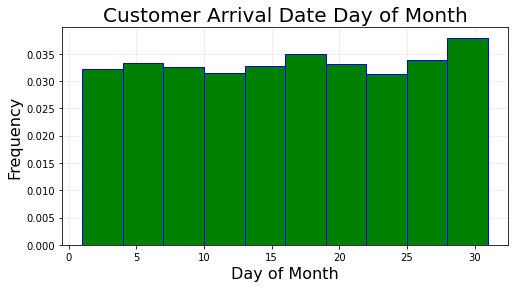

In [12]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(8,4))

# Plot density histogram 
dfHotel.hist(column="arrival_date_day_of_month", density= True, ax=ax, facecolor="green", edgecolor="blue")

# Add a title
ax.set_title("Customer Arrival Date Day of Month", fontsize=20)

# Add axis labels 
ax.set_xlabel("Day of Month", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make the grid lines lighter and put them behind data 
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

***Comment on histogram shape and advice in this cell.***

From the histogram for arrival_date_of_month, we can see that there is no skew and this data is uniform. This makes sense because generally people arrive at a hotel on any given day of a month, without regard to the number on the calendar. And since each month the 1st falls on a different day of the week, it makes sense that the data would be evenly distributed. 

Thus, I would tell my advisees that the arrival date of month has a normal distribution, so they should expect roughly an equal number of bookings on say for instance the the 5th of each month.

In [13]:
 dfHotel["arrival_date_day_of_month"].describe()

count    119390.000000
mean         15.798241
std           8.780829
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: arrival_date_day_of_month, dtype: float64

***2] (8 points) Give a 5-number summary and box-and-whisker plot for the week number of year for arrival date and advise on what you find.*** 

In [14]:
# put your code for Part C, #2 (5-number summary) in this cell
dfHotel["arrival_date_week_number"].describe()

count    119390.000000
mean         27.165173
std          13.605138
min           1.000000
25%          16.000000
50%          28.000000
75%          38.000000
max          53.000000
Name: arrival_date_week_number, dtype: float64

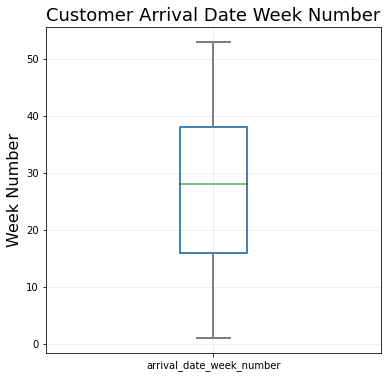

In [15]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(6,6))

# Plot histogram, but this time return dictionary of style parameters for modification after the fact 
bp = dfHotel.boxplot(column="arrival_date_week_number", ax=ax, widths=[.2], return_type='dict');

# ---------------------------------------
# Set properties of various parts of plot 
# ---------------------------------------

# Change properties of boxes 
for box in bp['boxes']:
    box.set(color='steelblue', linewidth=2)
    
# Change properties of whiskers 
for whisker in bp['whiskers']:
    whisker.set(color='gray', linewidth=2)
    
# Change properties of caps 
for cap in bp['caps']:
    cap.set(color='gray', linewidth=2)
    
# Change properties of median 
for cap in bp['medians']:
    cap.set(color='green', linewidth=2, alpha=0.5)
    
# Change properties of fliers (outliers) 
for flier in bp['fliers']:
    flier.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax.set_title('Customer Arrival Date Week Number', fontsize=18)
ax.set_ylabel("Week Number", fontsize=16)

# Make grid-lines lighter
ax.grid(alpha=0.25)

***Put your advice for week number of year for arrival date here.***

From the five number summary and box and whiskers for arrival_date_week_number, we can see that like arrival_date_day_of_month, there is no skew and this data is normally distributed. Again this makes sense because people arrive at a hotel at all times throughout the year and generally pretty evenly. 

Thus, I would tell my advisees that the week number of year for arrival date has a normal distribution, which means that roughly 50% of arrivals occur between weeks 16-38, then remaining 50% of arrivals are split evenly 25% between week 1-16 and the other 25% of arrivals week 38-53.

# Part D
***

Now it is requested that you describe your findings concerning the lead time for hotel reservations.

***1] (2 points) Create a $\color{red}{\text{frequency}}$ histogram of `lead_time`***

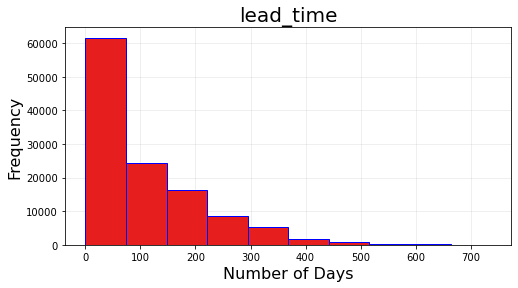

In [16]:
# Code here for your answer to Part D, #1

# Initialize figure 
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram with custom colors
mycolor =np.array([230,30,30])/255
dfHotel.hist(column="lead_time", ax=ax, facecolor=mycolor, edgecolor="blue")

# Add a title
ax.set_title("lead_time", fontsize=20)

# Add axis labels 
ax.set_xlabel("Number of Days", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make the grid lines lighter and put them behind data 
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

***2] (2 points) What shape is the histogram; right skew, left skew, symmetric, uniform,... and what does the histogram shape indicate about the number of days that elapsed between the entering date of the booking into the PMS and the arrival date.?***


Answer to Part D #2 here: 

The histogram of lead_time is right skewed, which indicates that customers generally arrive at the hotel soon after entering the booking in the PMS. This implies that customers do not plan their vacations far in advance. 

***3] (2 points) What is the average (mean) lead time for all hotels?***

In [17]:
# Code your answer for Part D #3 here.
avg= dfHotel["lead_time"].mean()
print("The average (mean) lead time for all hotels is: ",avg)

The average (mean) lead time for all hotels is:  104.01141636652986


# Problem 2
***

For Problem 2 we are looking at the data from a study investigating school childrens intelligence. The data consists of 1500 participants and some of their data.

# Part A

***1] (1 point) Read in the csv file, "foot_smart.csv".***

Create a data frame called FootIQ and take a look at it.

In [18]:
# Read in the file and look at it here:
dfFootIQ = pd.read_csv("foot_smart.csv")
dfFootIQ.head()

,foot_length,shoe_size,sex,IQ,US_section,city_size
0,7.96,8,0,23.8,West,500K
1,6.76,7,0,21.3,West,500K
2,6.96,7,1,22.2,East,500K
3,7.86,8,1,25.3,East,100K
4,8.17,9,0,23.9,East,100K


In [19]:
dfFootIQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   foot_length  1500 non-null   float64
 1   shoe_size    1500 non-null   int64  
 2   sex          1500 non-null   int64  
 3   IQ           1500 non-null   float64
 4   US_section   1500 non-null   object 
 5   city_size    1500 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 70.4+ KB


# Description of this data Set

This is a data set of 1500 participants. The participants are all children from 7 different schools. 

***foot_length:*** This is the length of the students foot in inches.

***shoe_size:*** This is the size of the shoe worn by the student.

***sex:*** This is the sex of the student: 0 female, 1 male.

***IQ:*** This is a measure of intelligence as measured on a standard exam, scaled from 0 to 35.

***US_section:*** This is the section of the U.S. that the student comes from.

***city_size:*** This is the approximate size of the city (in thousands) from which the student came from.

***2] (4 points) Clean the data***

Notice that `city_size` has data entered as '100K' for 100,000 and 1M for 1,000,000.

Clean this column so that it holds integers such as 100000 and 1000000 instead of 100K and 1M. 

In [20]:
#remove characters and convert short hand K and M to proper integers
dfFootIQ['city_size'] = dfFootIQ['city_size'].str.replace('K','000',regex=True)
dfFootIQ['city_size'] = dfFootIQ['city_size'].str.replace('M','000000',regex=True)
dfFootIQ['city_size'] = dfFootIQ['city_size'].str.replace(',','',regex=True)
dfFootIQ['city_size'] = dfFootIQ['city_size'].astype(int)  # cast to integer

In [21]:
dfFootIQ.info() #successfully converted to integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   foot_length  1500 non-null   float64
 1   shoe_size    1500 non-null   int64  
 2   sex          1500 non-null   int64  
 3   IQ           1500 non-null   float64
 4   US_section   1500 non-null   object 
 5   city_size    1500 non-null   int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 64.6+ KB


In [22]:
dfFootIQ.head() #and numbers successfully were converted

,foot_length,shoe_size,sex,IQ,US_section,city_size
0,7.96,8,0,23.8,West,500000
1,6.76,7,0,21.3,West,500000
2,6.96,7,1,22.2,East,500000
3,7.86,8,1,25.3,East,100000
4,8.17,9,0,23.9,East,100000


# Part B
***

***Suppose we were to make a scatterplot for foot length and city size (`foot_length` and `city_size`).***

***Note (i)*** The scatter plot has discrete values on the y-axis which makes the 'scatter plot' look like lines.

***Note (ii)*** There is no discernible pattern. The city's of various sizes (on the y-axis) contain students with shoe sizes (on the x-axis) all across the shoe-size spectrum. Meaning students of a particular shoe size do not tend to congregate in citys  of a particular size.

This seems to be common sense; for instance, there is no reason why every student of shoe size 7 would come from a city of size 500,000.

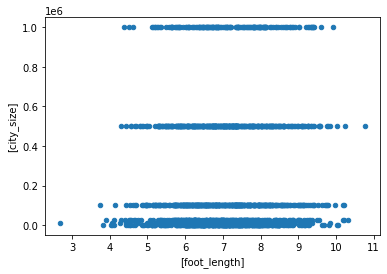

In [23]:
# Uncomment the code below and run it.
ax1 = dfFootIQ.plot.scatter(x=['foot_length'], y=['city_size'])

***Make two scatterplots:***

   1] ***(2 points)*** A scatterplot for shoe_size and IQ

   2] ***(2 points)*** A scatterplot for foot_length and IQ

Note: these two scatterplots should reveal the same thing since shoe size and foot lenght are really the same thing. The scatterplots will look different though since shoe size is discrete and foot length is continuous.

3] ***(1 point)*** Explain your findings. Either explain why no pattern is found, or if you detect a pattern, then explain why such a pattern exists between shoe size and intelligence.

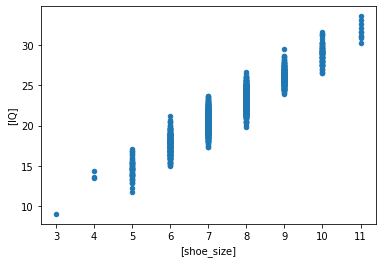

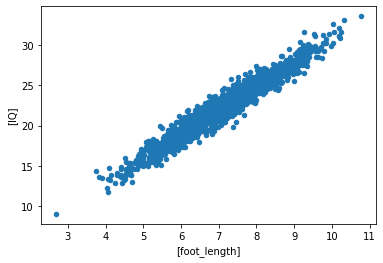

In [24]:
# Code your scatterplots for Part B here

#scatterplot for shoe size and IQ
ax1 = dfFootIQ.plot.scatter(x=['shoe_size'], y=['IQ'])
#scatterplot for foot length and IQ
ax1 = dfFootIQ.plot.scatter(x=['foot_length'], y=['IQ'])

***Explain your scatterplot findings for Part B here:***
- The scatterplots for shoe_size vs IQ and foot_length vs IQ show linear relationships, which suggests that a larger foot length will correspond to a higher IQ. This pattern likely exists because as a child gets older, their foot grows and their brains mature so they are able to learn and understand more.

# Problem 3
***

# Part A
The mean of a set of data should of course change if/when the values in the data set change.

The code in the cell below finds the mean shoe size for the dfFootIQ data


In [25]:
# Uncomment the code below and run it
print("The mean shoe size is ", (dfFootIQ["shoe_size"]).mean())

The mean shoe size is  7.556666666666667


Now, suppose you add 2 to each shoe size in the data set. How will the mean change?

In [26]:
# Uncomment the code below and run it.
print("The mean shoe size with 2 added to each entry is ", (dfFootIQ["shoe_size"]+2).mean())

The mean shoe size with 2 added to each entry is  9.556666666666667


***(4 points)*** It appears that the mean simply increases by 2. Does adding 'a' to each data point simply increase the mean by 'a'? ***Prove it.***

Recall the formula for mean:

$$\bar{x} = \frac{1}{n} \displaystyle\sum_{k=1}^n x_k$$


***Proof for part A: Mean with Addition***: When we add a constant 'a' to each entry the mean increased by the constant 'a'.  Let $y_k = x_k + a$ be the shifted observations.  

$$
\bar{y} = \frac{1}{n} \sum_{k=1}^n y_k \quad = \quad \frac{1}{n} \sum_{k=1}^n (x_k + a) \quad = \quad 
\frac{1}{n} \sum_{k=1}^n x_k  + \frac{1}{n} \sum_{k=1}^n a 
\quad = \quad \bar{x}  + \frac{1}{n} \cdot a \cdot n 
\quad = \quad \bar{x}  + a 
$$

# Part B
The standard deviation of a set of data should of course change if/when the values in the data set change.

The code in the cell below finds the standard deviation for 'shoe size' in the dfFootIQ data.

In [27]:
# Uncomment the code below and run it.
print("Standard deviation for shoe size is ", (dfFootIQ["shoe_size"]).std())

Standard deviation for shoe size is  1.224113771362388


Now, suppose we add 2 to each shoe sizein the data set. How will the standard deviation change?

In [28]:
# Uncomment the code below and run it.
print("The standard deviation with 2 added to each entry is ", (dfFootIQ["shoe_size"]+2).std())


The standard deviation with 2 added to each entry is  1.224113771362388


***(4 points)*** It appears as if the standard deviation doesn't change at all after the addition of 2 to each data point. Is it always true that adding 'a' to each data point does not change the standard deviation? ***Prove it.***

Recall the formula for standard deviation:

$$s = \sqrt{\frac{1}{n-1} \sum_{k=1}^n \left( x_k - \bar{x}\right)^2} $$


***Proof for part B: Std Dev with Addition:*** For any constant 'a', adding 'a' to each data point does not change the standard deviation.  This is because the std dev is a measure of the spread of the data, and by adding a constant to each observation it just shift everything down the number line.  Again, let $y_k = x_k + a$ be the shifted observations.  

$$
\sqrt{\frac{1}{n-1}\sum_{k=1}^n \left( y_k - \bar{y} \right)^2 } \quad = \quad 
\sqrt{\frac{1}{n-1}\sum_{k=1}^n \left[ (x_k + a) - (\bar{x}+a) \right]^2 } \quad = \quad 
\sqrt{\frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x} \right)^2 } 
$$



# Part C
Suppose each data point in `shoe_size` were to be multiplied by 5.

In [29]:
print("The mean shoe size is ", (dfFootIQ["shoe_size"]).mean())
print("The mean after each shoe size is multiplied by 5 is  ", (dfFootIQ["shoe_size"]*5).mean())

The mean shoe size is  7.556666666666667
The mean after each shoe size is multiplied by 5 is   37.78333333333333


***(4 points)*** Prove the pattern that you notice above will occur every time under multiplication.

***Proof for part C: Mean with Multiplication***: If you multiply each entry some constant 'b', the mean also gets multiplied by 'b'. Let $z_k = b \cdot x_k$ be the multiplied entries.  


$$
\bar{z} = \frac{1}{n} \sum_{k=1}^n z_k \quad = \quad \frac{1}{n} \sum_{k=1}^n b \cdot x_k  \quad = \quad 
b \cdot \frac{1}{n} \sum_{k=1}^n x_k  
\quad = \quad b\cdot \bar{x}  
$$



# Part D

Again, suppose each data point in `shoe_size` were to be multiplied by 5.

In [30]:
print("The shoe size standard deviation is ", (dfFootIQ["shoe_size"]).std())
print("The shoe size standard deviation after multiplying each point by 5 is ", (dfFootIQ["shoe_size"]*5).std())



The shoe size standard deviation is  1.224113771362388
The shoe size standard deviation after multiplying each point by 5 is  6.120568856811966


***(4 points)*** Prove the pattern that you notice above will occur every time under multiplication.

***Proof for part D: Std Dev with Multiplication***: If you multiply each entry by some constant 'b', the Standard Deviation also gets multiplied by 'b'. Let $z_k = b \cdot x_k$ be the multiplied entries. 

$$
\sqrt{\frac{1}{n-1}\sum_{k=1}^n \left( z_k - \bar{z} \right)^2 } \quad = \quad 
\sqrt{\frac{1}{n-1}\sum_{k=1}^n \left( b\cdot x_k - b\cdot \bar{x} \right)^2 } \quad = \quad 
\sqrt{\frac{1}{n-1}\sum_{k=1}^n b^2 \cdot \left( x_k - \bar{x} \right)^2 } \quad = \quad 
b\cdot \sqrt{\frac{1}{n-1}\sum_{k=1}^n  \left( x_k - \bar{x} \right)^2 } 
$$
